In [1]:
#this command might be relevant ony on GPU nodes. But the notebook will run on CPU as well
#If running on CPU remove the command wherever it appears
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 49 not upgraded.
Need to get 3,722 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com

In [ ]:
!pip install h2o

     |████████████████████████████████| 123.4MB 71kB/s 
  Created wheel for h2o: filename=h2o-3.28.0.1-py2.py3-none-any.whl size=123410554 sha256=168ca8e2cbf809df8675b09983d1f1374c69d2043856b7abad946d0a207736eb
  Stored in directory: /root/.cache/pip/wheels/ff/82/f4/3fe9c895b93c53b25ae44dc44aa54dad571c711f48bc485fe9
Successfully built h2o


In [5]:
pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=459f0806ec8c66268bd2345fc3af1e494292178932e5d1e35b36b3a852fc4b3f
  Stored in directory: /root/.cache/pip/wheels/62/f9/aa/687bd54342d2981bc78e22ee9b9bc39f92006e344e7aa1e0ac
Successfully built h2o


In [7]:
import h2o
print(h2o.__version__)

3.46.0.6


In [8]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.25" 2024-10-15; OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpci6fpn4x
  JVM stdout: /tmp/tmpci6fpn4x/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpci6fpn4x/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,2 months and 15 days
H2O_cluster_name:,H2O_from_python_unknownUser_fyli1f
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [10]:
from h2o.automl import H2OAutoML

In [11]:
churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# this datasets is taken from IBM and it is official dataset.

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [12]:
churn_df.types

{'customerID': 'string',
 'gender': 'enum',
 'SeniorCitizen': 'int',
 'Partner': 'enum',
 'Dependents': 'enum',
 'tenure': 'int',
 'PhoneService': 'enum',
 'MultipleLines': 'enum',
 'InternetService': 'enum',
 'OnlineSecurity': 'enum',
 'OnlineBackup': 'enum',
 'DeviceProtection': 'enum',
 'TechSupport': 'enum',
 'StreamingTV': 'enum',
 'StreamingMovies': 'enum',
 'Contract': 'enum',
 'PaperlessBilling': 'enum',
 'PaymentMethod': 'enum',
 'MonthlyCharges': 'real',
 'TotalCharges': 'real',
 'Churn': 'enum'}

In [13]:
churn_df.describe()

Rows:7043
Cols:21

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [14]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [15]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.7,5036.3,Yes
5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.5,2686.05,No


In [16]:
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")

In [17]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)


In [18]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [19]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
07:39:31.148: Project: AutoML_1_20250117_73931
07:39:31.150: Cross-validation disabled by user: no fold column nor nfolds > 1.
07:39:31.151: Setting stopping tolerance adaptively based on the training frame: 0.01426099724080391
07:39:31.151: Build control seed: 10
07:39:31.154: training frame: Frame key: AutoML_1_20250117_73931_training_py_2_sid_b4c7    cols: 21    rows: 4917  chunks: 8    size: 265851  checksum: -2232499397343926089
07:39:31.154: validation frame: Frame key: py_4_sid_b4c7    cols: 21    rows: 1054  chunks: 8    size: 138876  checksum: 3810434584061282018
07:39:31.154: leaderboard frame: Frame key: py_4_sid_b4c7    cols: 21    rows: 1054  chunks: 8    size: 138876  checksum: 3810434584061282018
07:39:31.155: blending frame: NULL
07:39:31.155: response column: Churn
07:39:31.155: fold column: null
07:39:31.155: weights column: null
07:39:31.210: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), 

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_1_20250117_73931


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    40                 40                          40687                  7            7            7             37            102           76.325

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.09242150863106496
RMSE: 0.3040090601134528
LogLoss: 0.30161476285147565
Mean Per-Class Error: 0.15130018263690967
AUC: 0.9380604308802624
AUCPR: 0.8466124873822938
Gini: 0.8761208617605247

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4039788217947005
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3250  366    0.1012   (366.0/3616.0)
Yes    262   1039   0.2014   (262.0/1301.0)
Total  3512  1405   0.1277   (628.0/4917.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.403979     0.767923  188
max f2                       0.20202      0.848954  275
max f0point5                 0.526118     0.787936  140
max accuracy                 0.440383     0.87472   174
max precision                0.935651     1         0
max recall                   0.0282642    1         381
max specificity              0.935651     1         0
max absolute_mcc             0.403979     0.680956  188
max min_per_class_accuracy   0.344699     0.856264  215
max mean_per_class_accuracy  0.289727     0.866907  236
max tns                      0.935651     3616      0
max fns                      0.935651     1299      0
max fps                      0.0113823    3616      399
max tps                      0.0282642    1301      381
max tnr                      0.935651     1         0
max fnr                      0.935651     0.998463  0
max fpr                      0.0113823    1         399
max tpr                      0.0282642    1         381

Gains/Lift Table: Avg response rate: 26.46 %, avg score: 26.50 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101688                   0.891031           3.7794     3.7794             1                0.908279   1                           0.908279            0.038432        0.038432                   277.94    277.94             0.038432
2        0.0201342                   0.866671           3.7794     3.7794             1                0.87853    1                           0.893555            0.0376633       0.0760953                  277.94    277.94             0.0760953
3        0.0300997                   0.847092           3.62514    3.72833            0.959184         0.856208   0.986486                    0.88119             0.0361261       0.112221                   262.514   272.833            0.111668
4        0.0400651                   0.828842           3.7794     3.74103            1                0.836832   0.989848                    0.870157            0.0376633       0.149885                   277.94    274.103            0.149332
5        0.0500305                   0.805049           3.47088    3.68722            0.918367         0.816229   0.97561                 

In [20]:
h2o.display.toggle_user_tips()

In [23]:
lb = aml.leaderboard

In [24]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_2_AutoML_1_20250117_73931,0.855557,0.414556,0.677597,0.215143,0.368198,0.135569
GBM_1_AutoML_1_20250117_73931,0.854408,0.414617,0.681106,0.229041,0.367657,0.135172
GBM_3_AutoML_1_20250117_73931,0.851807,0.420578,0.675719,0.222096,0.370989,0.137633
GLM_1_AutoML_1_20250117_73931,0.84902,0.421427,0.659416,0.222489,0.370098,0.136973
XGBoost_3_AutoML_1_20250117_73931,0.847405,0.426626,0.653708,0.223009,0.374804,0.140478
GBM_4_AutoML_1_20250117_73931,0.844658,0.43409,0.657102,0.227599,0.37779,0.142725
XGBoost_1_AutoML_1_20250117_73931,0.840931,0.434997,0.66677,0.237856,0.376438,0.141705
XRT_1_AutoML_1_20250117_73931,0.837469,0.433567,0.670884,0.244637,0.375428,0.140946
DRF_1_AutoML_1_20250117_73931,0.832298,0.469046,0.649408,0.235638,0.378917,0.143578
XGBoost_2_AutoML_1_20250117_73931,0.832002,0.454429,0.636243,0.237993,0.384155,0.147575


In [25]:
churn_pred=aml.leader.predict(churn_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [26]:
churn_pred.head()

predict,No,Yes
Yes,0.322788,0.677212
Yes,0.147846,0.852154
No,0.838582,0.161418
Yes,0.379853,0.620147
Yes,0.0595659,0.940434
No,0.977113,0.0228871
No,0.898587,0.101413
No,0.94576,0.0542399
No,0.967485,0.0325146
No,0.943972,0.0560277


In [27]:
aml.leader.model_performance(churn_test)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1376170507212462
RMSE: 0.37096772193985583
LogLoss: 0.42067591077249317
Mean Per-Class Error: 0.22052697616060224
AUC: 0.8402577848750997
AUCPR: 0.6329268868622667
Gini: 0.6805155697501994

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20429838541674872
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     573   224    0.2811   (224.0/797.0)
Yes    44    231    0.16     (44.0/275.0)
Total  617   455    0.25     (268.0/1072.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.204298     0.632877  250
max f2                       0.170897     0.751737  264
max f0point5                 0.530903     0.620975  121
max accuracy                 0.530903     0.80597   121
max precision                0.940434     1         0
max recall                   0.0202589    1         387
max specificity              0.940434     1         0
max absolute_mcc             0.204298     0.493875  250
max min_per_class_accuracy   0.253551     0.74655   229
max mean_per_class_accuracy  0.204298     0.779473  250
max tns                      0.940434     797       0
max fns                      0.940434     274       0
max fps                      0.0114864    797       399
max tps                      0.0202589    275       387
max tnr                      0.940434     1         0
max fnr                      0.940434     0.996364  0
max fpr                      0.0114864    1         399
max tpr                      0.0202589    1         387

Gains/Lift Table: Avg response rate: 25.65 %, avg score: 25.83 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0102612                   0.891035           3.5438     3.5438             0.909091         0.908365   0.909091                    0.908365            0.0363636       0.0363636                  254.38    254.38             0.0351089
2        0.0205224                   0.869886           2.83504    3.18942            0.727273         0.880728   0.818182                    0.894547            0.0290909       0.0654545                  183.504   218.942            0.0604357
3        0.0307836                   0.854651           3.18942    3.18942            0.818182         0.862324   0.818182                    0.883806            0.0327273       0.0981818                  218.942   218.942            0.0906536
4        0.0401119                   0.841667           2.72873    3.08228            0.7              0.848138   0.790698                    0.875511            0.0254545       0.123636                   172.873   208.228            0.112344
5        0.0503731                   0.81652            2.48066    2.95973            0.636364         0.829082   0.759259                    0.866053            0.0254545       0.149091                   148.066   195.973            0.13278
6        0.100746                    0.686298           2.81535    2.88754            0.722222         0.740704   0.740741                    0.803379            0.141818        0.290909                   181.535   188.754            0.255777
7        0.150187                    0.604657           2.20652    2.66335            0.566038         0.641976   0.68323                     0.750246            0.109091        0.4                        120.652   166.335            0.33601
8        0.20056

In [28]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [29]:
model_ids

['GBM_2_AutoML_1_20250117_73931',
 'GBM_1_AutoML_1_20250117_73931',
 'GBM_3_AutoML_1_20250117_73931',
 'GLM_1_AutoML_1_20250117_73931',
 'XGBoost_3_AutoML_1_20250117_73931',
 'GBM_4_AutoML_1_20250117_73931',
 'XGBoost_1_AutoML_1_20250117_73931',
 'XRT_1_AutoML_1_20250117_73931',
 'DRF_1_AutoML_1_20250117_73931',
 'XGBoost_2_AutoML_1_20250117_73931']

In [30]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20250117_73931


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10271712422148757
RMSE: 0.32049512355336635
LogLoss: 0.3265859088298944
Mean Per-Class Error: 0.1742617999768728
AUC: 0.9151624771278731
AUCPR: 0.7997749678863508
Gini: 0.8303249542557463

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38817788447652546
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3184  432    0.1195   (432.0/3616.0)
Yes    298   1003   0.2291   (298.0/1301.0)
Total  3482  1435   0.1485   (730.0/4917.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.388178     0.733187  192
max f2                       0.199393     0.813922  271
max f0point5                 0.577163     0.750266  122
max accuracy                 0.478839     0.857433  159
max precision                0.958154     1         0
max recall                   0.0167434    1         384
max specificity              0.958154     1         0
max absolute_mcc             0.388178     0.632137  192
max min_per_class_accuracy   0.312388     0.823982  224
max mean_per_class_accuracy  0.278863     0.831434  237
max tns                      0.958154     3616      0
max fns                      0.958154     1298      0
max fps                      0.0019827    3616      399
max tps                      0.0167434    1301      384
max tnr                      0.958154     1         0
max fnr                      0.958154     0.997694  0
max fpr                      0.0019827    1         399
max tpr                      0.0167434    1         384

Gains/Lift Table: Avg response rate: 26.46 %, avg score: 26.48 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101688                   0.915145           3.70381    3.70381            0.98             0.934517    0.98                        0.934517            0.0376633       0.0376633                  270.381   270.381            0.0373868
2        0.0201342                   0.893579           3.62514    3.66487            0.959184         0.904355    0.969697                    0.919588            0.0361261       0.0737894                  262.514   266.487            0.0729597
3        0.0300997                   0.86486            3.62514    3.65172            0.959184         0.878782    0.966216                    0.906078            0.0361261       0.109915                   262.514   265.172            0.108533
4        0.0400651                   0.84311            3.39375    3.58755            0.897959         0.854406    0.949239                    0.893226            0.0338201       0.143736                   239.375   258.755            0.14097
5        0.0502339                   0.819098           3.32587    3.53458            0.88             0.830619    0.935223                    0.880552            0.0338201       0.177556                   232.587   253.458            0.173131
6        0.100061                    0.707251           3.20863    3.37227            0.84898          0.761664    0.892276                    0.82135             0.159877        0.337433                   220.863   237.227            0.322776
7        0.150092                    0.620308           2.8576     3.2007

In [31]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [32]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_3_AutoML_1_20250117_73931',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_3_AutoML_1_20250117_73931'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20250117_73931_training_py_2_sid_b4c7',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20250117_73931_training_py_2_sid_b4c7'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20250117_73931_training_py_2_sid_b4c7',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20250117_73931_training_py_2_sid_b4c7'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type

In [33]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.8,
  'objective': 'binary:logistic',
  'min_child_weight': 3.0,
  'nthread': 2,
  'seed': 18,
  'max_depth': 5,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.8,
  'max_delta_step': 0.0,
  'tree_method': 'exact'},
 35)

In [34]:
out

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20250117_73931


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10271712422148757
RMSE: 0.32049512355336635
LogLoss: 0.3265859088298944
Mean Per-Class Error: 0.1742617999768728
AUC: 0.9151624771278731
AUCPR: 0.7997749678863508
Gini: 0.8303249542557463

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38817788447652546
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3184  432    0.1195   (432.0/3616.0)
Yes    298   1003   0.2291   (298.0/1301.0)
Total  3482  1435   0.1485   (730.0/4917.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.388178     0.733187  192
max f2                       0.199393     0.813922  271
max f0point5                 0.577163     0.750266  122
max accuracy                 0.478839     0.857433  159
max precision                0.958154     1         0
max recall                   0.0167434    1         384
max specificity              0.958154     1         0
max absolute_mcc             0.388178     0.632137  192
max min_per_class_accuracy   0.312388     0.823982  224
max mean_per_class_accuracy  0.278863     0.831434  237
max tns                      0.958154     3616      0
max fns                      0.958154     1298      0
max fps                      0.0019827    3616      399
max tps                      0.0167434    1301      384
max tnr                      0.958154     1         0
max fnr                      0.958154     0.997694  0
max fpr                      0.0019827    1         399
max tpr                      0.0167434    1         384

Gains/Lift Table: Avg response rate: 26.46 %, avg score: 26.48 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101688                   0.915145           3.70381    3.70381            0.98             0.934517    0.98                        0.934517            0.0376633       0.0376633                  270.381   270.381            0.0373868
2        0.0201342                   0.893579           3.62514    3.66487            0.959184         0.904355    0.969697                    0.919588            0.0361261       0.0737894                  262.514   266.487            0.0729597
3        0.0300997                   0.86486            3.62514    3.65172            0.959184         0.878782    0.966216                    0.906078            0.0361261       0.109915                   262.514   265.172            0.108533
4        0.0400651                   0.84311            3.39375    3.58755            0.897959         0.854406    0.949239                    0.893226            0.0338201       0.143736                   239.375   258.755            0.14097
5        0.0502339                   0.819098           3.32587    3.53458            0.88             0.830619    0.935223                    0.880552            0.0338201       0.177556                   232.587   253.458            0.173131
6        0.100061                    0.707251           3.20863    3.37227            0.84898          0.761664    0.892276                    0.82135             0.159877        0.337433                   220.863   237.227            0.322776
7        0.150092                    0.620308           2.8576     3.2007

In [35]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [36]:
out.confusion_matrix()

,No,Yes,Error,Rate
No,3184.0,432.0,0.1195,(432.0/3616.0)
Yes,298.0,1003.0,0.2291,(298.0/1301.0)
Total,3482.0,1435.0,0.1485,(730.0/4917.0)


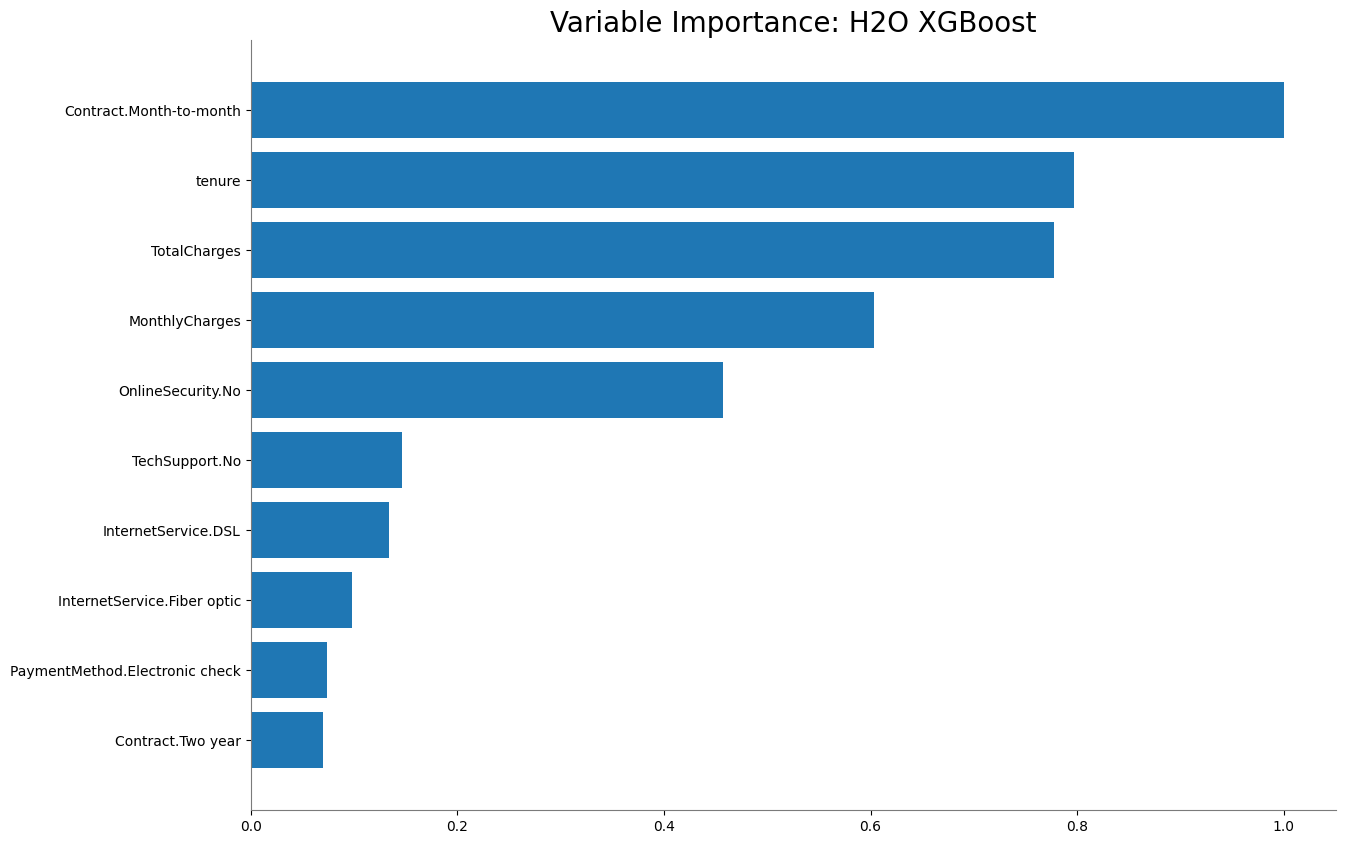

<Figure size 640x480 with 0 Axes>

In [37]:
out.varimp_plot()

In [38]:
aml.leader.download_mojo(path = "./")

'/content/GBM_2_AutoML_1_20250117_73931.zip'